In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#%matplotlib inline
#%matplotlib widget
import matplotlib.pyplot as plt

In [2]:
print("Hello")

Hello


In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
from sklearn import datasets
boston = datasets.load_boston()

In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
boston.keys()
boston.data.shape
boston.feature_names
boston.target

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

(506, 13)

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [7]:
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
boston_df['House_Price'] = boston.target
boston_df.head()
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House_Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House_Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
x = boston_df.drop('House_Price', axis=1)
y = boston_df['House_Price']
x.head()
y.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: House_Price, dtype: float64

In [10]:
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.3, random_state=1)
train_x.shape
test_x.shape
train_y.shape
test_y.shape

(354, 13)

(152, 13)

(354,)

(152,)

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

In [12]:
lm = LinearRegression()
lm_lasso = Lasso()
lm_ridge = Ridge()
lm_elastic = ElasticNet()
lm
lm_lasso
lm_ridge
lm_elastic

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [13]:

lm.fit(train_x, train_y)
lm_lasso.fit(train_x, train_y)
lm_ridge.fit(train_x, train_y)
lm_elastic.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [14]:
import statsmodels.api as sm
X2 = sm.add_constant(train_x)
lm = sm.OLS

In [15]:
x.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [16]:
ft_importances_lm

NameError: name 'ft_importances_lm' is not defined

In [ ]:
#%matplotlib widget
import matplotlib.pyplot as plt
plt.figure()
x = [1,2,3]
y = [4,5,6]
plt.plot(x,y)
plt.show()

In [ ]:
ft_importances_lm = pd.Series(lm.coef_, index = x.columns)
ft_importances_lm
plt.figure(figsize=(15,10))
ft_importances_lm.plot(kind='barh')
plt.show()

In [ ]:
ft_importances_lm = pd.Series(lm_lasso.coef_, index = x.columns)
ft_importances_lm
plt.figure(figsize=(15,10))
ft_importances_lm.plot(kind='barh')
plt.show()

In [ ]:
ft_importances_lm = pd.Series(lm_ridge.coef_, index = x.columns)
ft_importances_lm
plt.figure(figsize=(15,10))
ft_importances_lm.plot(kind='barh')
plt.show()

In [ ]:
ft_importances_lm = pd.Series(lm_elastic.coef_, index = x.columns)
ft_importances_lm
plt.figure(figsize=(15,10))
ft_importances_lm.plot(kind='barh')
plt.show()

<p class="jj jk ec aq jl b jm jn jo jp jq jr js jt ju jv jw" data-selectable-paragraph=""><a href="https://en.wikipedia.org/wiki/Logistic_regression" class="cz bu jx jy jz ka"><strong class="jl kb">Logistic Regression</strong></a> is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.</p>

<h1 class="kc kd ec aq ap ea ke kf kg kh ki kj kk kl km kn ko" data-selectable-paragraph="">Logistic Regression Assumptions</h1>
<ul class=""><li class="jj jk ec aq jl b jm kp jo kq jq kr js ks ju kt jw ku kv kw" data-selectable-paragraph="">Binary logistic regression requires the dependent variable to be binary.</li><li class="jj jk ec aq jl b jm kx jo ky jq kz js la ju lb jw ku kv kw" data-selectable-paragraph="">For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.</li><li class="jj jk ec aq jl b jm kx jo ky jq kz js la ju lb jw ku kv kw" data-selectable-paragraph="">Only the meaningful variables should be included.</li><li class="jj jk ec aq jl b jm kx jo ky jq kz js la ju lb jw ku kv kw" data-selectable-paragraph="">The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.</li><li class="jj jk ec aq jl b jm kx jo ky jq kz js la ju lb jw ku kv kw" data-selectable-paragraph="">The independent variables are linearly related to the log odds.</li><li class="jj jk ec aq jl b jm kx jo ky jq kz js la ju lb jw ku kv kw" data-selectable-paragraph="">Logistic regression requires quite large sample sizes.</li></ul>
Keeping the above assumptions in mind, let’s look at our dataset.
<p class="jj jk ec aq jl b jm jn jo jp jq jr js jt ju jv jw" data-selectable-paragraph="">Keeping the above assumptions in mind, let’s look at our dataset.</p>
<h1 class="kc kd ec aq ap ea ke kf kg kh ki kj kk kl km kn ko" data-selectable-paragraph="">Data</h1>
<p class="jj jk ec aq jl b jm kp jo kq jq kr js ks ju kt jw" data-selectable-paragraph="">The dataset comes from the <a href="http://archive.ics.uci.edu/ml/index.php" class="cz bu jx jy jz ka">UCI Machine Learning repository</a>, and it is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict whether the client will subscribe (1/0) to a term deposit (variable y). The dataset can be downloaded from <a href="https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv" class="cz bu jx jy jz ka">here</a>.</p>



In [ ]:
#Logistic Regression

import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

<p class="jj jk ec aq jl b jm jn jo jp jq jr js jt ju jv jw" data-selectable-paragraph="">The dataset provides the bank customers’ information. It includes 41,188 records and 21 fields.</p>

In [65]:
data=pd.read_csv(r"E:\masterswork\ML\DataAnalysisWithPython\banking.txt", header=0)
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

<p class="jj jk ec aq jl b jm jn jo jp jq jr js jt ju jv jw" data-selectable-paragraph=""><strong class="jl kb">Input variables</strong></p>
<ol class=""><li class="jj jk ec aq jl b jm jn jo jp jq jr js jt ju jv jw ll kv kw" data-selectable-paragraph="">age (numeric)</li><li class="jj jk ec aq jl b jm kx jo ky jq kz js la ju lb jw ll kv kw" data-selectable-paragraph="">job : type of job (categorical: “admin”, “blue-collar”, “entrepreneur”, “housemaid”, “management”, “retired”, “self-employed”, “services”, “student”, “technician”, “unemployed”, “unknown”)</li><li class="jj jk ec aq jl b jm kx jo ky jq kz js la ju lb jw ll kv kw" data-selectable-paragraph="">marital : marital status (categorical: “divorced”, “married”, “single”, “unknown”)</li><li class="jj jk ec aq jl b jm kx jo ky jq kz js la ju lb jw ll kv kw" data-selectable-paragraph="">education (categorical: “basic.4y”, “basic.6y”, “basic.9y”, “high.school”, “illiterate”, “professional.course”, “university.degree”, “unknown”)</li><li class="jj jk ec aq jl b jm kx jo ky jq kz js la ju lb jw ll kv kw" data-selectable-paragraph="">default: has credit in default? (categorical: “no”, “yes”, “unknown”)</li><li class="jj jk ec aq jl b jm kx jo ky jq kz js la ju lb jw ll kv kw" data-selectable-paragraph="">housing: has housing loan? (categorical: “no”, “yes”, “unknown”)</li><li class="jj jk ec aq jl b jm kx jo ky jq kz js la ju lb jw ll kv kw" data-selectable-paragraph="">loan: has personal loan? (categorical: “no”, “yes”, “unknown”)</li><li class="jj jk ec aq jl b jm kx jo ky jq kz js la ju lb jw ll kv kw" data-selectable-paragraph="">contact: contact communication type (categorical: “cellular”, “telephone”)</li><li class="jj jk ec aq jl b jm kx jo ky jq kz js la ju lb jw ll kv kw" data-selectable-paragraph="">month: last contact month of year (categorical: “jan”, “feb”, “mar”, …, “nov”, “dec”)</li><li class="jj jk ec aq jl b jm kx jo ky jq kz js la ju lb jw ll kv kw" data-selectable-paragraph="">day_of_week: last contact day of the week (categorical: “mon”, “tue”, “wed”, “thu”, “fri”)</li><li class="jj jk ec aq jl b jm kx jo ky jq kz js la ju lb jw ll kv kw" data-selectable-paragraph="">duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y=’no’). The duration is not known before a call is performed, also, after the end of the call, y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model</li><li class="jj jk ec aq jl b jm kx jo ky jq kz js la ju lb jw ll kv kw" data-selectable-paragraph="">campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)</li><li class="jj jk ec aq jl b jm kx jo ky jq kz js la ju lb jw ll kv kw" data-selectable-paragraph="">pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)</li><li class="jj jk ec aq jl b jm kx jo ky jq kz js la ju lb jw ll kv kw" data-selectable-paragraph="">previous: number of contacts performed before this campaign and for this client (numeric)</li><li class="jj jk ec aq jl b jm kx jo ky jq kz js la ju lb jw ll kv kw" data-selectable-paragraph="">poutcome: outcome of the previous marketing campaign (categorical: “failure”, “nonexistent”, “success”)</li><li class="jj jk ec aq jl b jm kx jo ky jq kz js la ju lb jw ll kv kw" data-selectable-paragraph="">emp.var.rate: employment variation rate — (numeric)</li><li class="jj jk ec aq jl b jm kx jo ky jq kz js la ju lb jw ll kv kw" data-selectable-paragraph="">cons.price.idx: consumer price index — (numeric)</li><li class="jj jk ec aq jl b jm kx jo ky jq kz js la ju lb jw ll kv kw" data-selectable-paragraph="">cons.conf.idx: consumer confidence index — (numeric)</li><li class="jj jk ec aq jl b jm kx jo ky jq kz js la ju lb jw ll kv kw" data-selectable-paragraph="">euribor3m: euribor 3 month rate — (numeric)</li><li class="jj jk ec aq jl b jm kx jo ky jq kz js la ju lb jw ll kv kw" data-selectable-paragraph="">nr.employed: number of employees — (numeric)</li></ol>
<p class="jj jk ec aq jl b jm jn jo jp jq jr js jt ju jv jw" data-selectable-paragraph=""><strong class="jl kb">Predict variable (desired target):</strong></p><p class="jj jk ec aq jl b jm jn jo jp jq jr js jt ju jv jw" data-selectable-paragraph="">y — has the client subscribed a term deposit? (binary: “1”, means “Yes”, “0” means “No”)</p>
<p class="jj jk ec aq jl b jm jn jo jp jq jr js jt ju jv jw" data-selectable-paragraph="">The education column of the dataset has many categories and we need to reduce the categories for a better modelling. The education column has the following categories:</p>

In [25]:
data.education.unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

<p class="jj jk ec aq jl b jm jn jo jp jq jr js jt ju jv jw" data-selectable-paragraph="">Let us group “basic.4y”, “basic.9y” and “basic.6y” together and call them “basic”.</p>

In [66]:
data['education']=np.where(data['education'] =='basic.9y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.6y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.4y', 'Basic', data['education'])

<p class="jj jk ec aq jl b jm jn jo jp jq jr js jt ju jv jw" data-selectable-paragraph="">After grouping, this is the columns:</p>

In [67]:
data.education.unique()

array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

<h1 class="kc kd ec aq ap ea ke lq kg lr ki ls kk lt km lu ko" data-selectable-paragraph="">Data exploration</h1>

In [68]:
data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

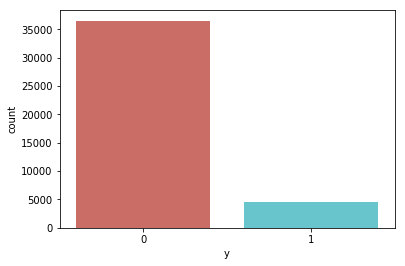

In [29]:
sns.countplot(x='y', data=data, palette='hls')
plt.show()

<p class="jj jk ec aq jl b jm jn jo jp jq jr js jt ju jv jw" data-selectable-paragraph="">Our classes are imbalanced, and the ratio of no-subscription to subscription instances is 89:11. Before we go ahead to balance the classes, let’s do some more exploration.</p>

In [30]:
count_no_sub = len(data[data['y']==0])
count_sub = len(data[data['y']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)

percentage of no subscription is 88.73458288821988
percentage of subscription 11.265417111780131


In [31]:
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


<p class="jj jk ec aq jl b jm jn jo jp jq jr js jt ju jv jw" data-selectable-paragraph=""><strong class="jl kb"><em class="lx">Observations</em></strong>:</p>
    <ul class=""><li class="jj jk ec aq jl b jm jn jo jp jq jr js jt ju jv jw ku kv kw" data-selectable-paragraph="">The average age of customers who bought the term deposit is higher than that of the customers who didn’t.</li><li class="jj jk ec aq jl b jm kx jo ky jq kz js la ju lb jw ku kv kw" data-selectable-paragraph="">The pdays (days since the customer was last contacted) is understandably lower for the customers who bought it. The lower the pdays, the better the memory of the last call and hence the better chances of a sale.</li><li class="jj jk ec aq jl b jm kx jo ky jq kz js la ju lb jw ku kv kw" data-selectable-paragraph="">Surprisingly, campaigns (number of contacts or calls made during the current campaign) are lower for customers who bought the term deposit.</li></ul>
    <p class="jj jk ec aq jl b jm jn jo jp jq jr js jt ju jv jw" data-selectable-paragraph="">We can calculate categorical means for other categorical variables such as education and marital status to get a more detailed sense of our data.</p>

In [32]:
data.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


In [33]:
data.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772,0.101573
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


<h1 class="kc kd ec aq ap ea ke lq kg lr ki ls kk lt km lu ko" data-selectable-paragraph="">Visualizations</h1>

Text(0.5, 1.0, 'Purchase Frequency for Job Title')

Text(0.5, 0, 'Job')

Text(0, 0.5, 'Frequency of Purchase')

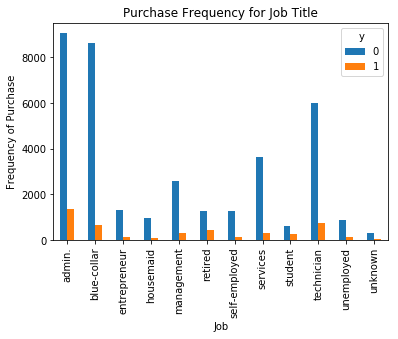

In [34]:
%matplotlib inline
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
#plt.savefig('purchase_fre_job')

<p class="jj jk ec aq jl b jm jn jo jp jq jr js jt ju jv jw" data-selectable-paragraph="">The frequency of purchase of the deposit depends a great deal on the job title. Thus, the job title can be a good predictor of the outcome variable.</p>

Text(0.5, 1.0, 'Stacked Bar Chart of Marital Status vs Purchase')

Text(0.5, 0, 'Marital Status')

Text(0, 0.5, 'Proportion of Customers')

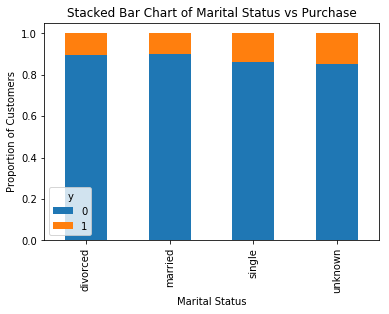

In [35]:
table=pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
#plt.savefig('mariral_vs_pur_stack')

<p class="jj jk ec aq jl b jm jn jo jp jq jr js jt ju jv jw" data-selectable-paragraph="">The marital status does not seem a strong predictor for the outcome variable.</p>

Text(0.5, 1.0, 'Stacked Bar Chart of Education vs Purchase')

Text(0.5, 0, 'Education')

Text(0, 0.5, 'Proportion of Customers')

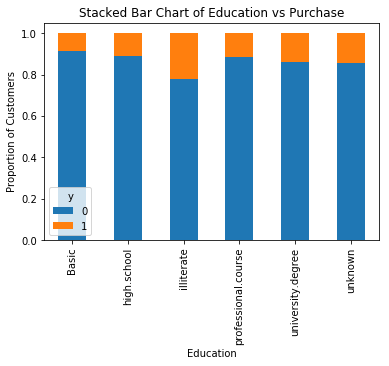

In [36]:
table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
#plt.savefig('edu_vs_pur_stack')

<p class="jj jk ec aq jl b jm jn jo jp jq jr js jt ju jv jw" data-selectable-paragraph="">Education seems a good predictor of the outcome variable.</p>

Text(0.5, 1.0, 'Purchase Frequency for Day of Week')

Text(0.5, 0, 'Day of Week')

Text(0, 0.5, 'Frequency of Purchase')

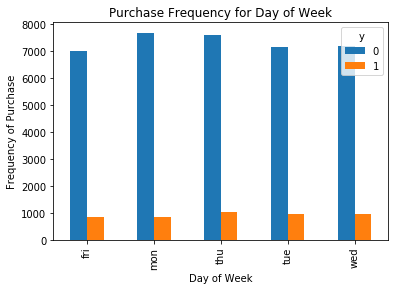

In [37]:
pd.crosstab(data.day_of_week,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')
#plt.savefig('pur_dayofweek_bar')

<p class="jj jk ec aq jl b jm jn jo jp jq jr js jt ju jv jw" data-selectable-paragraph="">Day of week may not be a good predictor of the outcome.</p>

Text(0.5, 1.0, 'Purchase Frequency for Month')

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Frequency of Purchase')

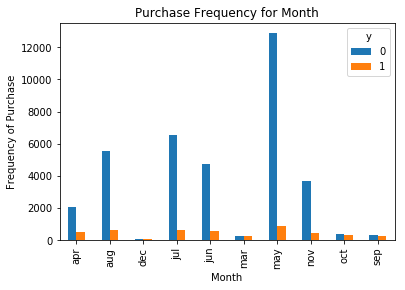

In [38]:
pd.crosstab(data.month,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_month_bar')

<p class="jj jk ec aq jl b jm jn jo jp jq jr js jt ju jv jw" data-selectable-paragraph="">Month might be a good predictor of the outcome variable.</p>

Text(0.5, 1.0, 'Histogram of Age')

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Frequency')

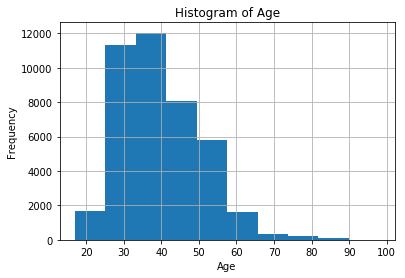

In [39]:
data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

<p class="jj jk ec aq jl b jm jn jo jp jq jr js jt ju jv jw" data-selectable-paragraph="">Most of the customers of the bank in this dataset are in the age range of 30–40.</p>

Text(0.5, 1.0, 'Purchase Frequency for Poutcome')

Text(0.5, 0, 'Poutcome')

Text(0, 0.5, 'Frequency of Purchase')

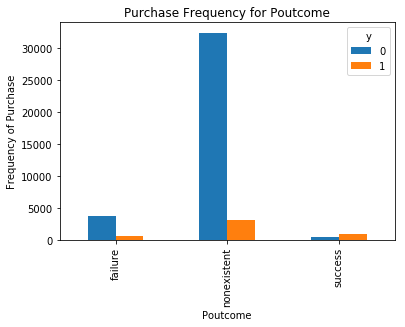

In [40]:
pd.crosstab(data.poutcome,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_pout_bar')

<p class="jj jk ec aq jl b jm jn jo jp jq jr js jt ju jv jw" data-selectable-paragraph="">Poutcome seems to be a good predictor of the outcome variable.</p>
<h1 class="kc kd ec aq ap ea ke kf kg kh ki kj kk kl km kn ko" data-selectable-paragraph=""><strong class="bc">Create dummy variables</strong></h1>
<p class="jj jk ec aq jl b jm kp jo kq jq kr js ks ju kt jw" data-selectable-paragraph="">That is variables with only two values, zero and one.</p>
<p class="jj jk ec aq jl b jm jn jo jp jq jr js jt ju jv jw" data-selectable-paragraph="">Our final data columns will be:</p>


In [41]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+vara
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [42]:
data_final=data[to_keep]
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

<h1 class="kc kd ec aq ap ea ke lq kg lr ki ls kk lt km lu ko" data-selectable-paragraph=""><strong class="bc">Over-sampling using SMOTE</strong></h1>
<p class="jj jk ec aq jl b jm kp jo kq jq kr js ks ju kt jw" data-selectable-paragraph="">With our training data created, I’ll up-sample the no-subscription using the <a href="https://arxiv.org/pdf/1106.1813.pdf" class="cz bu jx jy jz ka">SMOTE algorithm</a>(Synthetic Minority Oversampling Technique). At a high level, SMOTE:</p>
<ol class=""><li class="jj jk ec aq jl b jm jn jo jp jq jr js jt ju jv jw ll kv kw" data-selectable-paragraph="">Works by creating synthetic samples from the minor class (no-subscription) instead of creating copies.</li><li class="jj jk ec aq jl b jm kx jo ky jq kz js la ju lb jw ll kv kw" data-selectable-paragraph="">Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.</li></ol>
<p class="jj jk ec aq jl b jm jn jo jp jq jr js jt ju jv jw" data-selectable-paragraph="">We are going to implement <a href="http://imbalanced-learn.org/en/stable/over_sampling.html#smote-variants" class="cz bu jx jy jz ka">SMOTE in Python</a>.</p>


In [48]:
#SMOTE Synthetic Minority Over-sampling Technique
X = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train.values.ravel())
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  51134
Number of no subscription in oversampled data 25567
Number of subscription 25567
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


<div class="af hu ac dk w x"><p class="jj jk ec aq jl b jm jn jo jp jq jr js jt ju jv jw" data-selectable-paragraph="">Now we have a perfect balanced data! You may have noticed that I over-sampled only on the training data, because by oversampling only on the training data, none of the information in the test data is being used to create synthetic observations, therefore, no information will bleed from test data into the model training.</p><h1 class="kc kd ec aq ap ea ke kf kg kh ki kj kk kl km kn ko" data-selectable-paragraph=""><strong class="bc">Recursive Feature Elimination</strong></h1><p class="jj jk ec aq jl b jm kp jo kq jq kr js ks ju kt jw" data-selectable-paragraph=""><a href="http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html" class="cz bu jx jy jz ka">Recursive Feature Elimination (RFE)</a> is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.</p><pre class="is it iu iv iw hk fg ci"></pre></div>

In [52]:
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs', max_iter=10000)
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False False False False  True False False False  True False False False
 False  True False  True False False  True False False  True False False
 False False False False  True False False False  True False False False
 False False False False False False False  True  True  True  True  True
  True  True  True  True False False  True False False False  True False
  True]
[39 34 10 41  1  3 23 40  1 29  2 28 30  1 27  1 20 26  1 37  7  1 25 31
 19 35  5  9  1  8 22 21  1 14 42 36 15 38 16 18 17 12  6  1  1  1  1  1
  1  1  1  1 24 33  1 13 32  4  1 11  1]


<p class="jj jk ec aq jl b jm jn jo jp jq jr js jt ju jv jw" data-selectable-paragraph="">The RFE has helped us select the following features: “euribor3m”, “job_blue-collar”, “job_housemaid”, “marital_unknown”, “education_illiterate”, “default_no”, “default_unknown”, “contact_cellular”, “contact_telephone”, “month_apr”, “month_aug”, “month_dec”, “month_jul”, “month_jun”, “month_mar”, “month_may”, “month_nov”, “month_oct”, “poutcome_failure”, “poutcome_success”.</p>

In [53]:
cols=['euribor3m', 'job_blue-collar', 'job_housemaid', 'marital_unknown', 'education_illiterate', 'default_no', 'default_unknown', 
      'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 
      'month_may', 'month_nov', 'month_oct', "poutcome_failure", "poutcome_success"] 
X=os_data_X[cols]
y=os_data_y['y']

<h1 class="kc kd ec aq ap ea ke kf kg kh ki kj kk kl km kn ko" data-selectable-paragraph="">Implementing the model</h1>

In [56]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X, max_iter=10000)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.545904
         Iterations: 35
                                Results: Logit
Model:                   Logit                Pseudo R-squared:     0.212     
Dependent Variable:      y                    AIC:                  55868.4619
Date:                    2019-07-03 17:14     BIC:                  56045.3060
No. Observations:        51134                Log-Likelihood:       -27914.   
Df Model:                19                   LL-Null:              -35443.   
Df Residuals:            51114                LLR p-value:          0.0000    
Converged:               0.0000               Scale:                1.0000    
No. Iterations:          35.0000                                              
------------------------------------------------------------------------------
                      Coef.    Std.Err.    z     P>|z|     [0.025     0.975]  
------------------------------------------------------------------------------
euribor3m         

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<p class="jj jk ec aq jl b jm jn jo jp jq jr js jt ju jv jw" data-selectable-paragraph="">The p-values for most of the variables are smaller than 0.05, except four variables, therefore, we will remove them.</p>

In [57]:
cols=['euribor3m', 'job_blue-collar', 'job_housemaid', 'marital_unknown', 'education_illiterate', 
      'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 
      'month_may', 'month_nov', 'month_oct', "poutcome_failure", "poutcome_success"] 
X=os_data_X[cols]
y=os_data_y['y']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.555890
         Iterations 7
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.198     
Dependent Variable:   y                 AIC:               56881.7793
Date:                 2019-07-03 17:14  BIC:               57023.2546
No. Observations:     51134             Log-Likelihood:    -28425.   
Df Model:             15                LL-Null:           -35443.   
Df Residuals:         51118             LLR p-value:       0.0000    
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       7.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
euribor3m            -0.4488   0.0074 -60.6838 0.0000 -0.4632 -0.4343
job_blue-collar 

<h1 class="kc kd ec aq ap ea ke lq kg lr ki ls kk lt km lu ko" data-selectable-paragraph="">Logistic Regression Model Fitting</h1>

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression(solver='lbfgs', max_iter=10000)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

<p class="jj jk ec aq jl b jm jn jo jp jq jr js jt ju jv jw" data-selectable-paragraph=""><strong class="jl kb">Predicting the test set results and calculating the accuracy</strong><p class="jj jk ec aq jl b jm jn jo jp jq jr js jt ju jv jw" data-selectable-paragraph="">Our final data columns will be:</p></p>

In [60]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.74


<h1 class="kc kd ec aq ap ea ke kf kg kh ki kj kk kl km kn ko" data-selectable-paragraph="">Confusion Matrix</h1>

In [61]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[6124 1542]
 [2506 5169]]


<p class="jj jk ec aq jl b jm jn jo jp jq jr js jt ju jv jw" data-selectable-paragraph="">The result is telling us that we have <strong class="jl kb"><em class="lx">6124+5170</em></strong> correct predictions and <strong class="jl kb"><em class="lx">2505+1542</em></strong> incorrect predictions.</p>

<h1 class="kc kd ec aq ap ea ke kf kg kh ki kj kk kl km kn ko" data-selectable-paragraph=""><strong class="bc">Compute precision, recall, F-measure and support</strong></h1>
<p class="jj jk ec aq jl b jm kp jo kq jq kr js ks ju kt jw" data-selectable-paragraph="">To quote from <a href="http://scikit-learn.org/stable/index.html" class="cz bu jx jy jz ka">Scikit Learn</a>:</p>
<p class="jj jk ec aq jl b jm jn jo jp jq jr js jt ju jv jw" data-selectable-paragraph="">The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.</p>
<p class="jj jk ec aq jl b jm jn jo jp jq jr js jt ju jv jw" data-selectable-paragraph="">The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.</p>
<p class="jj jk ec aq jl b jm jn jo jp jq jr js jt ju jv jw" data-selectable-paragraph="">The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.</p>
<p class="jj jk ec aq jl b jm jn jo jp jq jr js jt ju jv jw" data-selectable-paragraph="">The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.</p>
<p class="jj jk ec aq jl b jm jn jo jp jq jr js jt ju jv jw" data-selectable-paragraph="">The support is the number of occurrences of each class in y_test.</p>


In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.80      0.75      7666
           1       0.77      0.67      0.72      7675

    accuracy                           0.74     15341
   macro avg       0.74      0.74      0.74     15341
weighted avg       0.74      0.74      0.74     15341



<p class="jj jk ec aq jl b jm jn jo jp jq jr js jt ju jv jw" data-selectable-paragraph=""><strong class="jl kb">Interpretation</strong>: Of the entire test set, 74% of the promoted term deposit were the term deposit that the customers liked. Of the entire test set, 74% of the customer’s preferred term deposits that were promoted.</p>

<h1 class="kc kd ec aq ap ea ke kf kg kh ki kj kk kl km kn ko" data-selectable-paragraph="">ROC Curve</h1>

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

<p class="jj jk ec aq jl b jm jn jo jp jq jr js jt ju jv jw" data-selectable-paragraph="">The dataset provides the bank customers’ information. It includes 41,188 records and 21 fields.</p>

<p class="jj jk ec aq jl b jm jn jo jp jq jr js jt ju jv jw" data-selectable-paragraph=""><a href="https://en.wikipedia.org/wiki/Receiver_operating_characteristic" class="cz bu jx jy jz ka">The receiver operating characteristic (ROC)</a> curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).</p>
<p class="jj jk ec aq jl b jm jn jo jp jq jr js jt ju jv jw" data-selectable-paragraph="">The Jupyter notebook used to make this post is available <a href="https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Logistic%20Regression%20balanced.ipynb" class="cz bu jx jy jz ka">here</a>. I would be pleased to receive feedback or questions on any of the above.</p>
<p class="jj jk ec aq jl b jm jn jo jp jq jr js jt ju jv jw" data-selectable-paragraph="">Reference: <a href="https://books.google.com/books/about/Learning_Predictive_Analytics_with_Pytho.html?id=Ia5KDAAAQBAJ&amp;printsec=frontcover&amp;source=kp_read_button#v=onepage&amp;q&amp;f=false" class="cz bu jx jy jz ka">Learning Predictive Analytics with Python book</a></p>
